# Tennis Ace

### I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) data, you will determine what it takes to be one of the best tennis players in the world.



<b> Importing the libraries <b>

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<b>Load and investigate the data here:<b>

In [3]:
df = pd.read_csv('tennis_stats.csv')

In [4]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Analysing the variables to see wich is better fit to use on our predict model

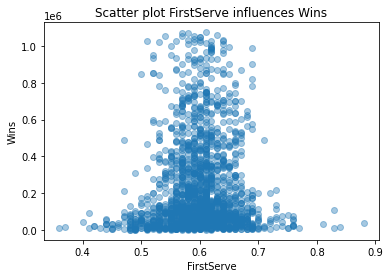

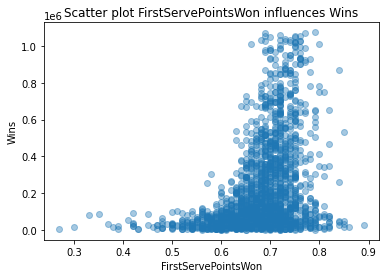

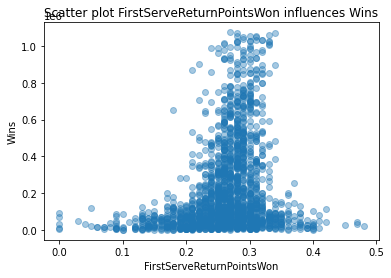

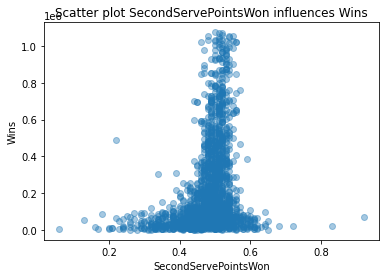

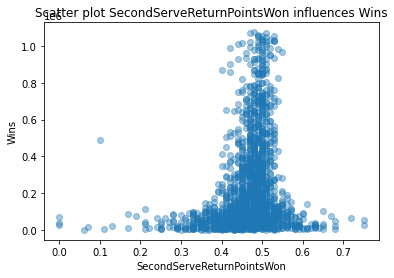

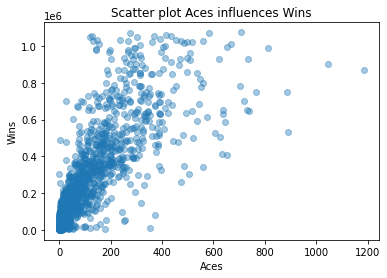

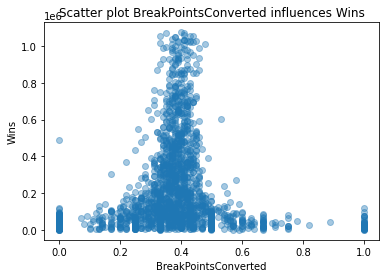

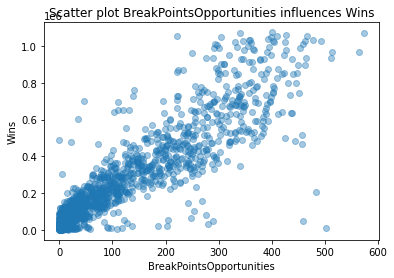

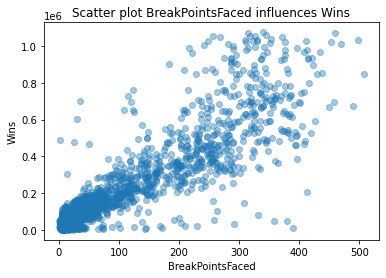

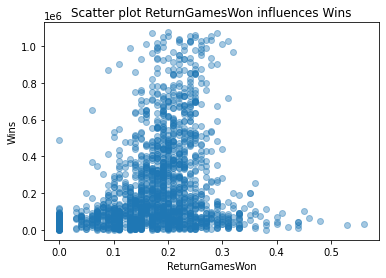

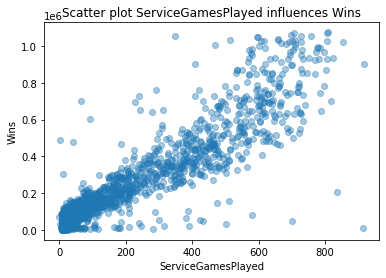

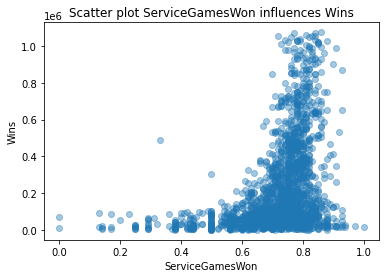

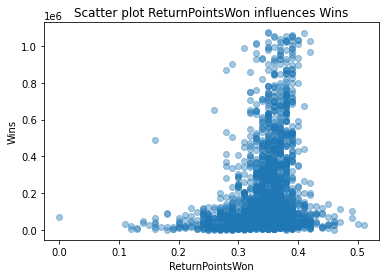

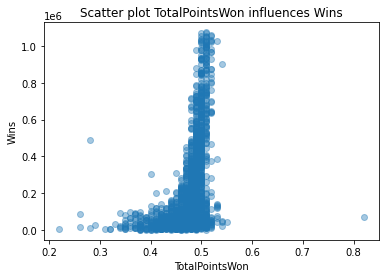

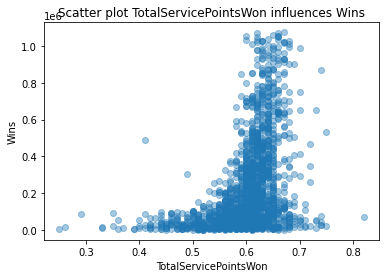

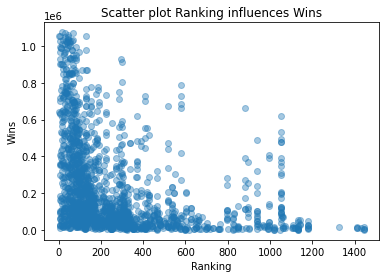

<Figure size 432x288 with 0 Axes>

In [7]:
x1 = df[['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsOpportunities', 'BreakPointsFaced', 'ReturnGamesWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'ReturnPointsWon', 'TotalPointsWon','TotalServicePointsWon', 'Ranking']]
y = df[['Winnings']]

def create_scatter (x):
    plt.scatter(df[[x]], df[['Winnings']], alpha=0.4)
    plt.xlabel(x)
    plt.ylabel('Wins')
    plt.title('Scatter plot {} influences Wins'.format(x))
    plt.show()
    plt.clf()

for i in x1:
    create_scatter(i)

the best fit to predict winnings are: 'Aces', 'BreakPointsOpportunities', 'BreakPointsFaced', 'ServiceGamesPlayed'

Creating a few more linear regression models that use one feature to predict one of the outcomes

The MLR coefficients are: 
 [[  82.87595985  756.19892142 -636.43354387  918.84799034]] 

Train score:
0.8412812184777536 

The mean squared error regression loss for the testing set is:
0.8322979655140925


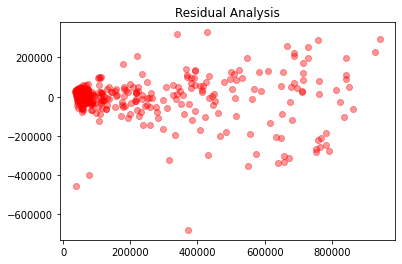

<Figure size 432x288 with 0 Axes>

In [14]:

x2 = df[['BreakPointsOpportunities']]
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

print('The MLR coefficients are:','\n' , mlr.coef_, '\n')

print('Train score:')
print(mlr.score(x_train, y_train), '\n')
#this means that we have 90% of acuracy about the variation wininggs 

print('The mean squared error regression loss for the testing set is:')
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4, color='red')
plt.title('Residual Analysis')
plt.show()
plt.clf()

Create a few linear regression models that use two features to predict yearly earnings.

The MLR coefficients are: 
 [[   1874.08256496 -202734.02101984]] 

Train score:
0.8130656716515741 

The mean squared error regression loss for the testing set is:
0.8099289371304075


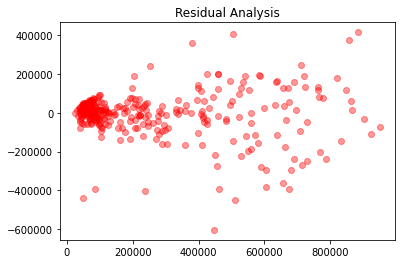

<Figure size 432x288 with 0 Axes>

In [16]:
x3 = df[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
x_train, x_test, y_train, y_test = train_test_split(x3, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

print('The MLR coefficients are:','\n' , mlr.coef_, '\n')

print('Train score:')
print(mlr.score(x_train, y_train), '\n')
#this means that we have 90% of acuracy about the variation wininggs 

print('The mean squared error regression loss for the testing set is:')
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4, color='red')
plt.title('Residual Analysis')
plt.show()
plt.clf()

Create a few linear regression models that use multiple features to predict yearly earnings

The MLR coefficients are: 
 [[ 4.89875702e+04  7.42901191e+04  9.89184931e+01  7.92483649e+04
   4.70268779e+04 -7.10208818e+00  5.62669716e+03 -8.60991766e+02
   7.53181435e+02  3.32485493e+04  6.79780919e+02 -6.85735194e+02
   3.74129584e+04 -4.69127299e+04  1.60370526e+03  2.25631677e+04
  -1.37104257e+05 -1.17035532e+05]] 

Train score:
0.8446529121626147 

The mean squared error regression loss for the testing set is:
0.8290563866666139


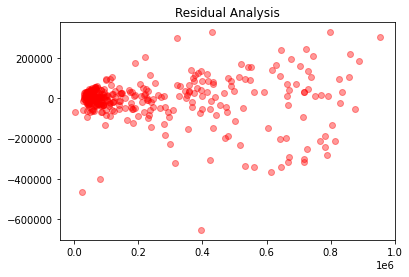

<Figure size 432x288 with 0 Axes>

In [17]:
x4 = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]

x_train, x_test, y_train, y_test = train_test_split(x4, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

print('The MLR coefficients are:','\n' , mlr.coef_, '\n')

print('Train score:')
print(mlr.score(x_train, y_train), '\n')
#this means that we have 90% of acuracy about the variation wininggs 

print('The mean squared error regression loss for the testing set is:')
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4, color='red')
plt.title('Residual Analysis')
plt.show()
plt.clf()